# Plotting with seaborn

<table>
<tr>
<td><img src="https://i.imgur.com/3cYy56H.png" width="350px"/></td>
<td><img src="https://i.imgur.com/V9jAreo.png" width="350px"/></td>
<td><img src="https://i.imgur.com/5a6dwtm.png" width="350px"/></td>
<td><img src="https://i.imgur.com/ZSsHzrA.png" width="350px"/></td>
</tr>
<tr>
<td style="font-weight:bold; font-size:16px;">Count (Bar) Plot</td>
<td style="font-weight:bold; font-size:16px;">KDE Plot</td>
<td style="font-weight:bold; font-size:16px;">Joint (Hex) Plot</td>
<td style="font-weight:bold; font-size:16px;">Violin Plot</td>
</tr>
<tr>
<td>sns.countplot()</td>
<td>sns.kdeplot()</td>
<td>sns.jointplot()</td>
<td>sns.violinplot()</td>
</tr>
<tr>
<td>Good for nominal and small ordinal categorical data.</td>
<td>Good for interval data.</td>
<td>Good for interval and some nominal categorical data.</td>
<td>Good for interval data and some nominal categorical data.</td>
</tr>
</table>

In the previous two sections we explored data visualization using the `pandas` built-in plotting tools. In this section, we'll do the same with `seaborn`.

`seaborn` is a standalone data visualization package that provides many extremely valuable data visualizations in a single package. It is generally a much more powerful tool than `pandas`; let's see why.

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
reviews = pd.read_csv('./data/wine-reviews/winemag-data_first150k.csv', index_col=0)

In [5]:
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


# Countplot  ---- 相当于条形图

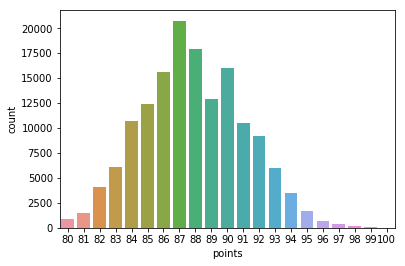

In [6]:
sns.countplot(reviews['points'])

# KDE Plot  --- 相比于折线图，不受异常值的影响，更平滑

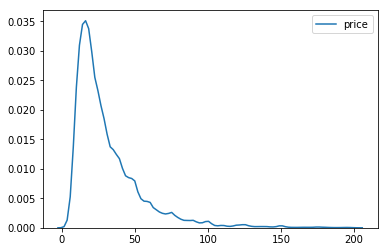

In [10]:
sns.kdeplot(reviews[reviews['price'] < 200]['price'])

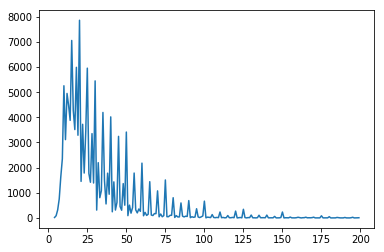

In [12]:
# 不信可以对比一下
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()

# Distplot --- 相当于直方图，不过多了kde曲线

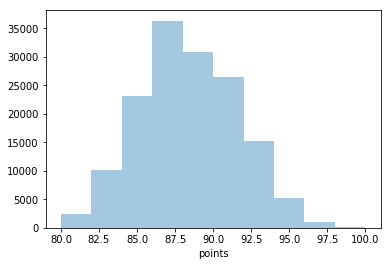

In [13]:
# bins -- 柱子的个数
# kde  -- 默认为True，即显示拟合线
sns.distplot(reviews['points'], bins=10, kde=False)

# Jointplot --- 相当于scatter/hex plot 和 hist 二合一

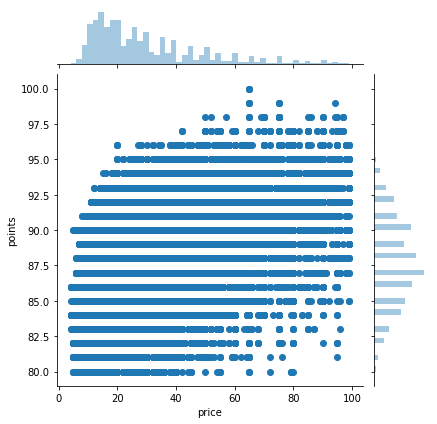

In [14]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100])

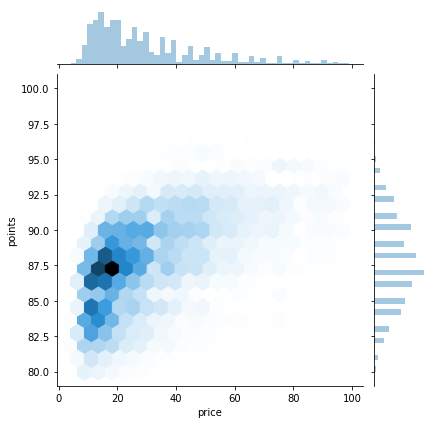

In [16]:
# 上图有点over plot了，很乱，这时候就要祭出hex
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='hex', gridsize=20)

# 箱型图(boxplot) 和 小提琴图(violin plot)

**前者优点，不受异常值的影响，能清楚的看清上下界限；后者优势更清楚看出琴箱的厚度分布，知道数据在那段分布密集**

箱型图参考[博客][1]

[1]:https://blog.csdn.net/qq_40587575/article/details/80215776

In [17]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

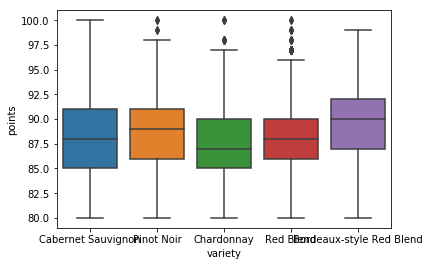

In [18]:
sns.boxplot(x='variety', y='points', data=df)

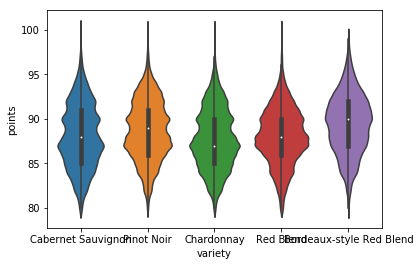

In [19]:
sns.violinplot(x='variety', y='points', data=df)

# 总结

## 为什么要用seaborn???

**比起pandas，seaborn能做更精细、专业、炫酷的可视化，pandas的适用于简单的数据探索，基础够用**